In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data():
    data=np.loadtxt(r'C:/Users/pedro\source/repos/PedroCorreia07/Machine Learing Specialization_Coursera/Course 1\data_logistic regression/ex2data1.txt', delimiter=',')
    X=data[:,:2] #creates a new NumPy array X which contains all the rows of data, but only the first two columns (0 and 1). Here, the syntax [:,:2] means to select all rows (:) and the first two columns (:2), so it effectively selects only the feature columns.
    y=data[:,2] #creates a new NumPy array y which contains all the rows of data, but only the third column (2). So, it effectively selects only the target column
    return X,y

In [3]:
#load dataset using function load_data
X, y=load_data()

In [4]:
import pandas as pd
df=pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

X_train=train[['X1','X2']]
y_train=train['y']

X_test=test[['X1','X2']]
y_test=test[['y']]

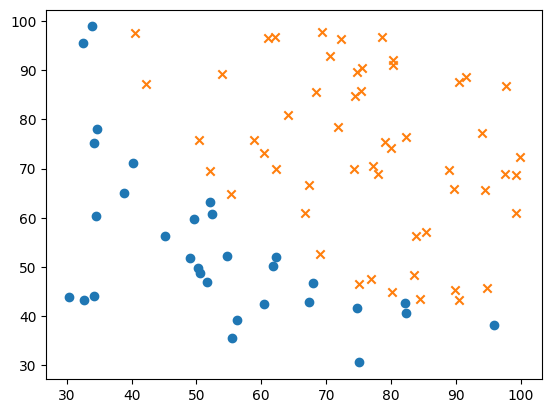

In [5]:
#Plotting the data points
plt.scatter(X_train[y_train==0]['X1'],X_train[y_train==0]['X2'],label='Class 0',marker='o')#This line plots the training data points corresponding to class 0. 
plt.scatter(X_train[y_train==1]['X1'],X_train[y_train==1]['X2'],label='Class 1',marker='x')#This line plots the training data points corresponding to class 1. 

In [6]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)


LogisticRegression()

In [7]:
y_pred=lr_model.predict(X_train)

print("Prediction on training set:",y_pred)

Prediction on training set: [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]


c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


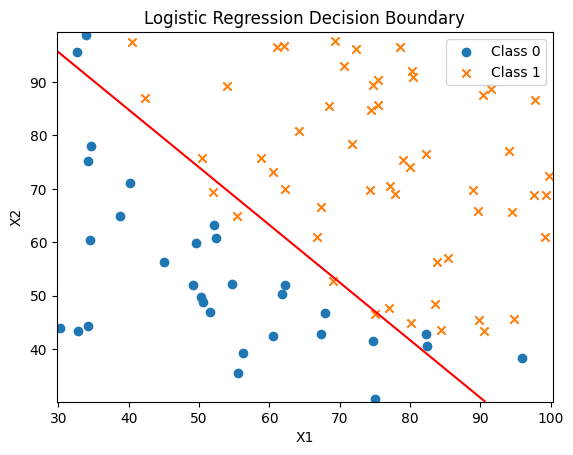

In [8]:
#Plotting the data points + plotting the decision boundary
plt.scatter(X_train[y_train==0]['X1'],X_train[y_train==0]['X2'],label='Class 0',marker='o')
plt.scatter(X_train[y_train==1]['X1'],X_train[y_train==1]['X2'],label='Class 1',marker='x')

x1_min,x1_max=X_train['X1'].min()-0.5,X_train['X1'].max()+0.5 #define the plot window||Adding a margin of 0.5 to the minimum and maximum values in x1_min and x1_max (and similarly for x2_min and x2_max) helps in providing a bit of padding around the data points when plotting the decision boundary.
x2_min,x2_max=X_train['X2'].min()-0.5,X_train['X2'].max()+0.5

#The meshgrid function is used to create a grid of points within the specified ranges x1_min to x1_max and x2_min to x2_max. 
xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01)) #This grid is necessary to evaluate the model's predictions across the entire plot window and generate the decision boundary.

#This line predicts the class labels for the grid points (xx1 and xx2) by using the trained logistic regression model (lr_model) and the predict method.
Z=lr_model.predict(np.c_[xx1.ravel(),xx2.ravel()]) #The grid points are flattened and stacked horizontally using np.c_ before making the predictions. The np.c_ is a function provided by NumPy that is used for concatenating arrays along the second axis. xx1.ravel() and xx2.ravel() are 2-dimensional arrays representing the coordinates of the grid points. The ravel() method is used to flatten these arrays into 1-dimensional arrays. By passing xx1.ravel() and xx2.ravel() as arguments to np.c_, the function concatenates them column-wise, resulting in a new 2-dimensional array where each row represents a point on the grid.

Z=Z.reshape(xx1.shape) #This line reshapes the predicted class labels (Z) to have the same shape as the grid points (xx1). It ensures that the predicted labels can be plotted as a contour.

#Set the contour where everything <0.5 is 0 and everything >0.5 is 1
plt.contour(xx1,xx2,Z,levels=[0.5],colors='r') #specifies the contour levels to be plotted. The levels = 0.5 parameter determines the specific contour values at which to draw the contour lines. This is a common choice for binary classification problems, as 0.5 is often used as the threshold for deciding between the two classes.

#Add labels, title and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

plt.show()

In [9]:
print("Accuracy on training set:",lr_model.score(X_train,y_train))

Accuracy on training set: 0.8941176470588236


In [10]:
X_test1 = np.array([[40, 90]])  # Convert the list to a NumPy array
y_pred_test=lr_model.predict(X_test1)
print(y_pred_test)

[1.]


c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
